In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Model
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
!wget https://www.timeseriesclassification.com/aeon-toolkit/ECG5000.zip
!unzip ECG5000.zip

--2025-05-28 12:54:52--  https://www.timeseriesclassification.com/aeon-toolkit/ECG5000.zip
Resolving www.timeseriesclassification.com (www.timeseriesclassification.com)... 212.78.75.243
Connecting to www.timeseriesclassification.com (www.timeseriesclassification.com)|212.78.75.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10614407 (10M) [application/zip]
Saving to: ‘ECG5000.zip’

ECG5000.zip         100%[===================>]  10.12M  12.4MB/s    in 0.8s    

2025-05-28 12:54:53 (12.4 MB/s) - ‘ECG5000.zip’ saved [10614407/10614407]

Archive:  ECG5000.zip
  inflating: ECG5000.txt             
  inflating: ECG5000_TEST.arff       
  inflating: ECG5000_TEST.txt        
  inflating: ECG5000_TRAIN.arff      
  inflating: ECG5000_TRAIN.txt       
  inflating: ECG5000_TEST.ts         
  inflating: ECG5000_TRAIN.ts        


In [4]:
!ls -art

ECG5000.zip	   ECG5000_TRAIN.txt   ECG5000_TEST.ts	 sample_data
ECG5000.txt	   ECG5000_TRAIN.arff  ECG5000_TRAIN.ts  ..
ECG5000_TEST.arff  ECG5000_TEST.txt    .config		 .


In [5]:
!cat ECG5000_TRAIN.txt ECG5000_TEST.txt > ecg_final.txt

In [6]:
!head ecg_final.txt

   1.0000000e+00  -1.1252183e-01  -2.8272038e+00  -3.7738969e+00  -4.3497511e+00  -4.3760410e+00  -3.4749863e+00  -2.1814082e+00  -1.8182865e+00  -1.2505219e+00  -4.7749208e-01  -3.6380791e-01  -4.9195659e-01  -4.2185509e-01  -3.0920086e-01  -4.9593870e-01  -3.4211867e-01  -3.5533627e-01  -3.6791303e-01  -3.1650279e-01  -4.1237405e-01  -4.7167181e-01  -4.1345783e-01  -3.6461703e-01  -4.4929829e-01  -4.7141866e-01  -4.2477658e-01  -4.6251673e-01  -5.5247236e-01  -4.7537519e-01  -6.9420000e-01  -7.0186810e-01  -5.9381178e-01  -6.6068415e-01  -7.1383066e-01  -7.6980688e-01  -6.7228161e-01  -6.5367605e-01  -6.3940562e-01  -5.5930228e-01  -5.9167032e-01  -4.9322332e-01  -4.6305183e-01  -3.0164382e-01  -2.3273401e-01  -1.2505488e-01  -1.5394314e-01  -2.4357404e-02  -6.5608758e-02   3.4999258e-02   6.1935219e-02   7.1195420e-02   1.2392505e-01   1.0312371e-01   2.2522849e-01   1.2868305e-01   3.0248315e-01   2.5727621e-01   1.9635161e-01   1.7938297e-01   2.4472863e-01   3.4121687e-01   3.282

In [14]:
df =pd.read_csv('ecg_final.txt', sep= '  ', header =None)

<ipython-input-14-0e79af14fc89>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df =pd.read_csv('ecg_final.txt', sep= '  ', header =None)


In [24]:
df.head()
print(df.shape)
## class 1 is nor activity of the heart, class 2 3 4 are the abnormal activity of the heart

(5000, 141)


In [16]:
df =df.add_prefix('c')
df.columns

Index(['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9',
       ...
       'c131', 'c132', 'c133', 'c134', 'c135', 'c136', 'c137', 'c138', 'c139',
       'c140'],
      dtype='object', length=141)

In [17]:
df['c0'].value_counts() ## checking the values

## planning to combine

,count
c0,
1.0,2919
2.0,1767
4.0,194
3.0,96
5.0,24


In [23]:
df.dropna()
df.shape

(5000, 141)

In [28]:
train_data, test_data, train_labels, test_lables = train_test_split(df.values, df.values[:, 0:1], test_size=0.2, random_state=111) ## still keeping the label in the feature

In [29]:
scaler = MinMaxScaler()
data_scaled = scaler.fit(train_data) ## calculating the min max and the tranform model for training data which will be used for test data as well.



In [30]:
data_scaled

MinMaxScaler()

In [32]:
train_data_scaled = data_scaled.transform(train_data)
test_data_scaled = data_scaled.transform(test_data)

train_data_scaled

array([[0.        , 0.50002524, 0.42299659, ..., 0.61680162, 0.58388556,
        0.3649298 ],
       [0.        , 0.48602565, 0.31200637, ..., 0.60438613, 0.6676527 ,
        0.40538671],
       [0.        , 0.6760041 , 0.6161329 , ..., 0.73484988, 0.64562905,
        0.43438114],
       ...,
       [0.25      , 0.70698484, 0.7982501 , ..., 0.23053824, 0.31421167,
        0.37774737],
       [0.        , 0.46498254, 0.25827775, ..., 0.6340938 , 0.66453824,
        0.47717869],
       [0.25      , 0.69314707, 0.79831145, ..., 0.68561341, 0.61110713,
        0.53512758]])

In [41]:
normal_train_data =pd.DataFrame(train_data_scaled).add_prefix('c').query('c0==0').values[:,1:]

anomaly_train_data = pd.DataFrame(train_data_scaled).add_prefix('c').query('c0>0').values[:,1:]

normal_train_data.shape

(2356, 140)

In [45]:
normal_test_data =pd.DataFrame(test_data_scaled).add_prefix('c').query('c0==0').values[:,1:]

anomaly_test_data = pd.DataFrame(test_data_scaled).add_prefix('c').query('c0>0').values[:,1:]

type(normal_test_data)

numpy.ndarray

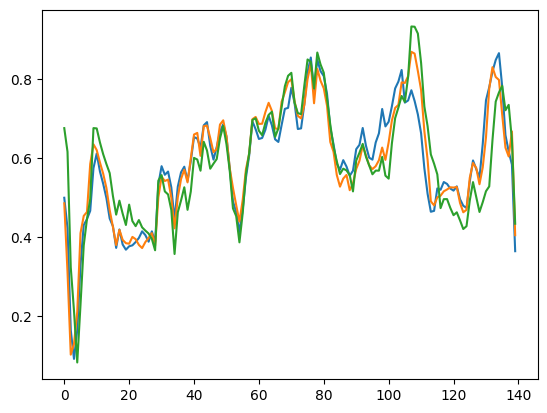

In [47]:
plt.plot(normal_train_data[0])
plt.plot(normal_train_data[1])
plt.plot(normal_train_data[2])

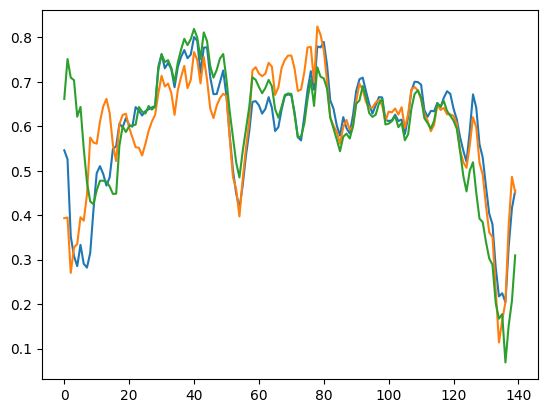

In [48]:
plt.plot(anomaly_train_data[0])
plt.plot(anomaly_train_data[1])
plt.plot(anomaly_train_data[2])

In [ ]:
## we are going to train